In [1]:
from __future__ import print_function, division

# 2. Density based plots with `matplotlib`

In this section, we will be looking at density based plots. Plots like these address a problem with big data: How does one visualise a plot with 10,000++ data points and avoid **overplotting**. 

In [13]:
import pandas as pd

PRSA = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv",
                  index_col=0)
PRSA.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


*Source* : https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

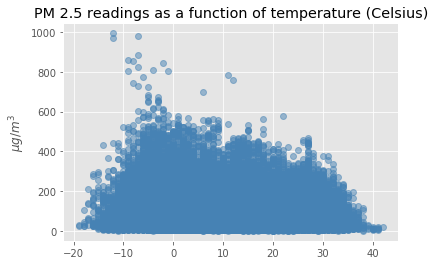

In [18]:
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline
use('ggplot')

plt.plot( PRSA.TEMP, PRSA["pm2.5"], 'o', color="steelblue", alpha=0.5)
plt.ylabel("$\mu g/m^3$")
plt.title("PM 2.5 readings as a function of temperature (Celsius)")


As one can see, there's not much one can say about the structure of the data because every point below 400 $\mu g/m^3$ is totally filled up with blue color. 

It is here, that a density plot helps mitigate this problem. The central idea is that individual data points are not so important in as much as they contribute to revealing the underlying **distribution** of the data. In other words, for large amounts of data, we want to visualize the distribution instead of visualizing how individual datapoints are placed. 

For this lesson, we will look at this data set and others to investigate the use of other plotting functions in `matplotlib`. 

## 2.1 Learning objectives 

  * To use Kernel Density Estimation Plots to visualize distribution of univariate data. 
  * To customize KDE plots using various keyword arguments to the underlying plotting function. 
  * To use 2D KDE plots and hexbin plots to plot 2D distributions.  